In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import root_mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

In [54]:
df = pd.read_csv('../../data/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [37]:
df.sample(10)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
1190,13.11,695-699,21000.0,21000.0,36.0
1720,11.99,725-729,23000.0,22975.0,36.0
125,19.72,695-699,25000.0,25000.0,60.0
1370,15.80,670-674,6000.0,6000.0,36.0
1579,12.69,670-674,5500.0,5500.0,36.0
364,10.59,735-739,10000.0,10000.0,36.0
1781,7.49,800-804,3000.0,3000.0,36.0
2154,8.90,700-704,7000.0,7000.0,36.0
1191,6.62,750-754,8500.0,8500.0,36.0
465,13.11,700-704,8000.0,8000.0,36.0


In [38]:
df.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [39]:
df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [55]:
encoder = LabelEncoder()
df['fico_range'] = encoder.fit_transform(df['fico_range'])

NameError: name 'LabelEncoder' is not defined

In [56]:
df.dtypes

interest_rate                 float64
fico_range                     object
amount_requested              float64
amount_funded_by_investors    float64
loan_length                   float64
dtype: object

In [42]:
df['fico_range'].describe()

count        2498
unique         38
top       670-674
freq          171
Name: fico_range, dtype: object

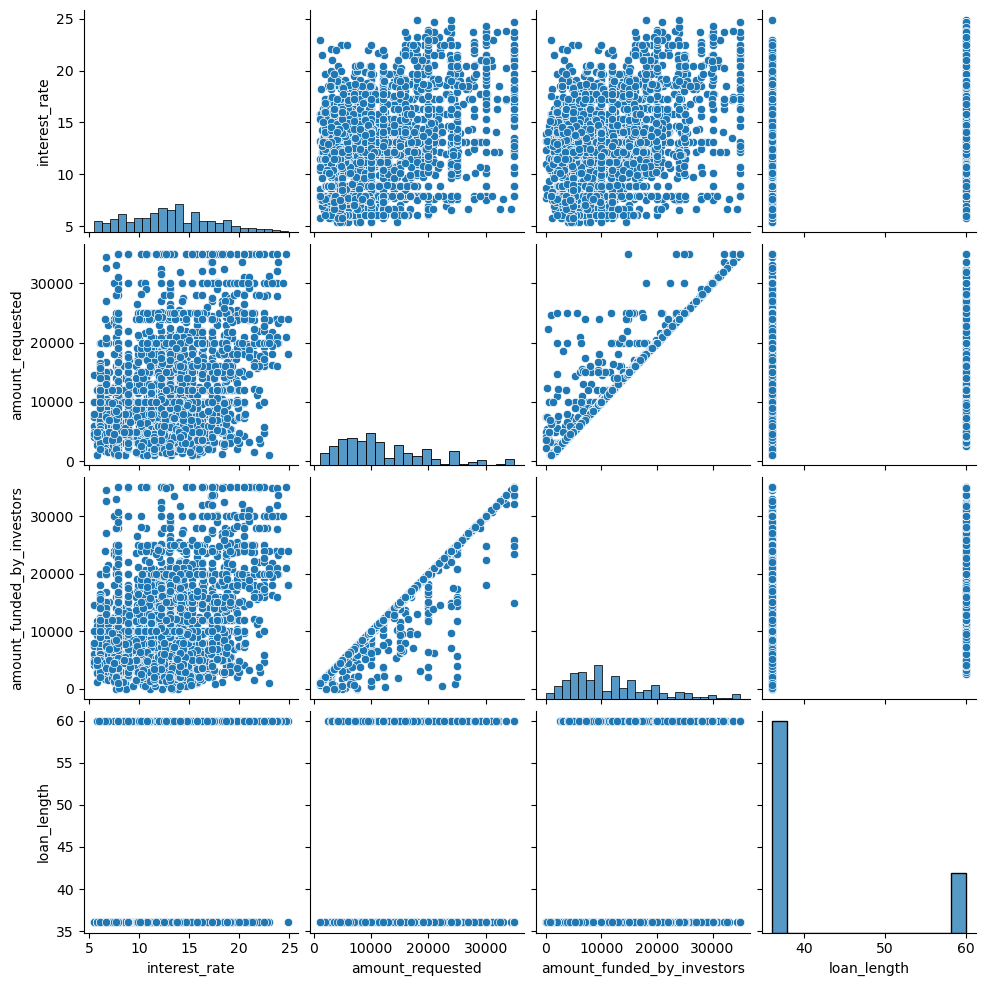

In [43]:
sns.pairplot(df)

#### Notes to scatter matrix

Most Noticable = Interest_rate w/ Amount funded by investors, amount requested.
6/16 shown to have a flat relationship 

#### Project Direction

Loan - Target to explores: 
X = Amount_requested, interest_rate, fico_range
y = loan_length

Investing/Brokerage
X = amount_funded_by_investors, fico_range
y = 


In [44]:
df.columns

Index(['interest_rate', 'fico_range', 'amount_requested',
       'amount_funded_by_investors', 'loan_length'],
      dtype='object')

In [45]:
X = df.drop(columns='loan_length')
y = df['loan_length']
X = sm.add_constant(X)


In [52]:
lin_model = LinearRegression()
lin_model = sm.OLS(y, X).fit()

print(lin_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [47]:
y_preds = lin_model.predict(X)
y_residuals = y - y_preds

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NameError: name 'y_preds' is not defined

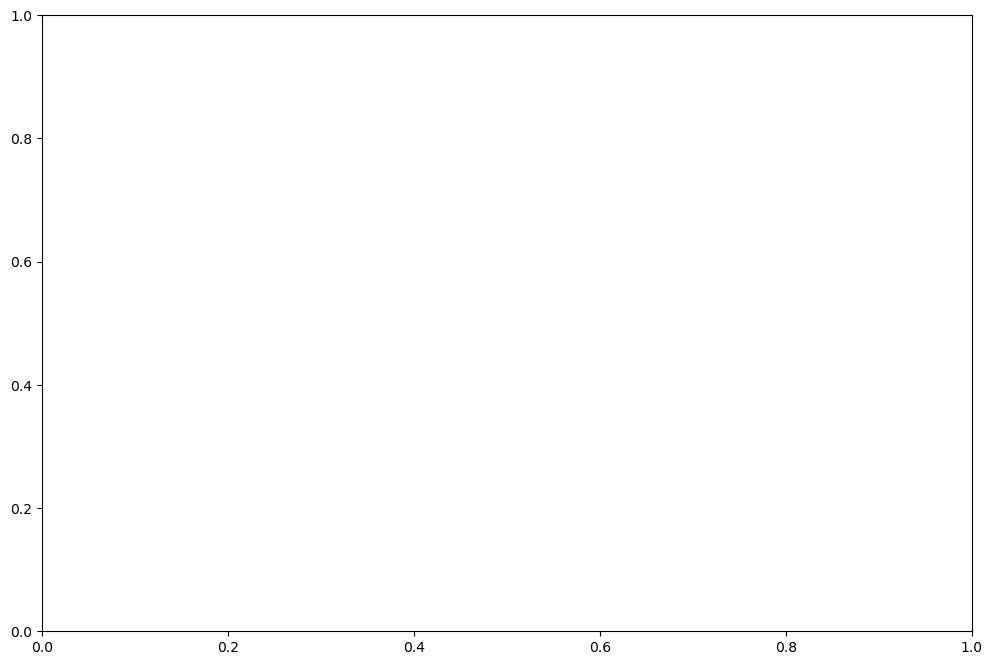

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=y_preds, y=y_residuals)
plt.axhline(y=0, color='r')
plt.title('Residuals vs. Predicted Loan Length')
plt.xlabel('Predicted Loan Length')
plt.ylabel('Residuals')
plt.show()